# Hola Francisco!

Mi nombre es David Bautista, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres.**

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div

¡Empecemos!

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General
    
~~Hola, Francisco, te felicito por el desarrollo del proyecto hasta el momento. Ahora bien, he dejado diferentes comentarios para que puedas tenerlos en cuenta para la siguiente entrega. Fíjate que deje un comentario con el subtítulo **Comentario Importante** el cual es importante que tengas en cuenta para que continuemos con la revisión del proyecto.~~
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General #2
    
Hola, Francisco, te felicito por la culminación del proyecto. Muy buen trabajo.
</div>

## Introcucción


Este proyecto aborda la optimización de estrategias en una tienda en línea a través de la priorización de hipótesis y la ejecución de pruebas A/B, con el objetivo de mejorar los ingresos. Utilizamos métodos analíticos para evaluar hipótesis basadas en impacto, confianza y esfuerzo, y analizamos los efectos de distintas intervenciones en grupos de usuarios mediante tests controlados. El proceso incluyó la carga y limpieza de datos, análisis estadístico y visualización de resultados, asegurando la toma de decisiones informadas para impulsar el crecimiento del negocio digital.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo con la sección de introducción y descripción del proyecto. 
</div>

 ## Cargado y preprocesado de datos

### Librerias

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo importando las librerías necesarias para el desarrollo del proyecto.
</div>

### Cargar los datos

In [3]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visitors = pd.read_csv('/datasets/visits_us.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente, buen trabajo con la carga de los datasets. </div>

### Crear copias de los DataFrames para trabajar

In [4]:
hypotheses_clean = hypotheses.copy()
orders_clean = orders.copy()
visitors_clean = visitors.copy()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Interesante, buena práctica generar copias limpias de los datasets. </div>

### Eliminar duplicados y manejar valores nulos

In [5]:
# Imprimir las primeras filas para revisar los datos
print("Hypotheses data preview:")
print(hypotheses_clean.head())
print("\nOrders data preview:")
print(orders_clean.head())
print("\nVisitors data preview:")
print(visitors_clean.head())

# Verificar duplicados y valores nulos
print("\nDuplicated entries in hypotheses:", hypotheses_clean.duplicated().sum())
print("Duplicated entries in orders:", orders_clean.duplicated().sum())
print("Duplicated entries in visitors:", visitors_clean.duplicated().sum())

print("\nMissing values in hypotheses:")
print(hypotheses_clean.isnull().sum())
print("\nMissing values in orders:")
print(orders_clean.isnull().sum())
print("\nMissing values in visitors:")
print(visitors_clean.isnull().sum())

# Eliminar duplicados y manejar valores nulos si es necesario
orders_clean = orders_clean.drop_duplicates()
visitors_clean = visitors_clean.drop_duplicates()

Hypotheses data preview:
                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  

Orders data preview:
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B

Visitors data preview:
         date group  v

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo con el proceso de revisión y tratamiento del problema de duplicados y nulos dentro de los datasets.  </div>

In [6]:
# Identificar y eliminar usuarios en ambos grupos
grouped_users = orders.groupby('visitorId')['group'].nunique()
users_in_both_groups = grouped_users[grouped_users > 1].index
orders_clean = orders[~orders['visitorId'].isin(users_in_both_groups)]

print(grouped_users)
print(users_in_both_groups)
print(orders_clean)

visitorId
5114589       1
6958315       1
8300375       2
11685486      1
39475350      1
             ..
4266935830    2
4278982564    1
4279090005    1
4281247801    1
4283872382    1
Name: group, Length: 1031, dtype: int64
Int64Index([   8300375,  199603092,  232979603,  237748145,  276558944,
             351125977,  393266494,  457167155,  471551937,  477780734,
             818047933,  963407295, 1230306981, 1294878855, 1316129916,
            1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
            1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
            2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
            2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
            2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
            3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
            3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
            3963646447, 3972127743, 3984495233, 406949

## Priorizar hipótesis

In [7]:
# Calcular ICE
hypotheses_clean['ICE'] = (hypotheses_clean['Impact'] * hypotheses_clean['Confidence']) / hypotheses_clean['Effort']
# Ordenar por ICE en orden descendente
ice_sorted = hypotheses_clean[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
print("Hipótesis ordenadas por ICE:\n", ice_sorted)

Hipótesis ordenadas por ICE:
                                           Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


Análisis de ICE:
La hipótesis relacionada con el lanzamiento de una promoción que otorga descuentos a los usuarios por compartir en redes sociales obtiene el puntaje más alto en ICE (16.2), lo que indica un alto impacto y confianza en relación con el esfuerzo necesario.

Otras hipótesis con puntajes ICE relativamente altos incluyen la adición de dos nuevos canales de tráfico (13.33) y la adición de un formulario de suscripción en todas las páginas principales (11.2).

In [8]:
# Calcular RICE
hypotheses_clean['RICE'] = (hypotheses_clean['Reach'] * hypotheses_clean['Impact'] * hypotheses_clean['Confidence']) / hypotheses_clean['Effort']
# Ordenar por RICE en orden descendente
rice_sorted = hypotheses_clean[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
print("Hipótesis ordenadas por RICE:\n", rice_sorted)

Hipótesis ordenadas por RICE:
                                           Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


Análisis de RICE:
Cuando aplicamos RICE, la hipótesis del formulario de suscripción salta al primer lugar con un puntaje de 112.0, destacando su gran potencial de alcance además de su impacto y confianza.

La hipótesis de recomendaciones de productos también muestra un aumento considerable en la priorización (de 7.0 en ICE a 56.0 en RICE), subrayando cómo el alto alcance amplifica la importancia de implementar estas recomendaciones.

In [9]:
comparison = hypotheses_clean[['Hypothesis', 'ICE', 'RICE']]
print("Comparación de ICE y RICE:\n", comparison)

Comparación de ICE y RICE:
                                           Hypothesis        ICE   RICE
0  Add two new channels for attracting traffic. T...  13.333333   40.0
1  Launch your own delivery service. This will sh...   2.000000    4.0
2  Add product recommendation blocks to the store...   7.000000   56.0
3  Change the category structure. This will incre...   1.125000    9.0
4  Change the background color on the main page. ...   1.000000    3.0
5  Add a customer review page. This will increase...   1.333333    4.0
6  Show banners with current offers and sales on ...   8.000000   40.0
7  Add a subscription form to all the main pages....  11.200000  112.0
8  Launch a promotion that gives users discounts ...  16.200000   16.2


Comparación de ICE y RICE:
Las hipótesis que tienen un componente de alto alcance, como los formularios de suscripción y las recomendaciones de productos, suben en la lista de prioridades cuando se utiliza RICE en lugar de ICE.
Esto indica que mientras que ICE es útil para evaluar el impacto directo y la eficiencia de la implementación de una hipótesis, RICE proporciona una mejor imagen al considerar el alcance potencial y el efecto multiplicador que puede tener una hipótesis en la base de usuarios más amplia.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo. Aplicas los frameworks RISE e ICE de manera correcta. Adicional a lo anterior, realizas una comparación de los resultados de muy buena manear y genera conclusiones coherentes e interesantes. </div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
**Comentario Importante** 
    
~~Hola, Francisco. He revisado toda to sección de Análisis de test A/B y realmente luce bien e interesante, ahora bien, me he fijado que antes de desarrollarla no has tenido en cuenta un aspecto importante para que las conclusiones que obtengamos sean las correctas, debes previos al desarrollo de los análisis identificar y eliminar los usuarios que están presentes en los dos grupos.~~ </div>


## Análisis de test A/B

### Preparación de los datos acumulados

In [10]:
# Convertir la columna 'date' a tipo datetime
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# Asegurarnos de que los tipos de datos son correctos
orders['revenue'] = orders['revenue'].astype(float)
orders['visitorId'] = orders['visitorId'].astype(str)

print(orders)
print(visitors)

      transactionId   visitorId       date  revenue group
0        3667963787  3312258926 2019-08-15     30.4     B
1        2804400009  3642806036 2019-08-15     15.2     B
2        2961555356  4069496402 2019-08-15     10.2     A
3        3797467345  1196621759 2019-08-15    155.1     B
4        2282983706  2322279887 2019-08-15     40.5     B
...             ...         ...        ...      ...   ...
1192     2662137336  3733762160 2019-08-14    100.8     B
1193     2203539145   370388673 2019-08-14     50.1     A
1194     1807773912   573423106 2019-08-14    165.3     A
1195     1947021204  1614305549 2019-08-14      5.5     A
1196     3936777065  2108080724 2019-08-15   3120.1     B

[1197 rows x 5 columns]
         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756
..        ...   ...     ...
57 2019-08-27     B     720
58 2019-08-28     B     654
59 2019-08-29     B     531

### Cálculo de datos acumulados

In [11]:
# Crear un DataFrame para acumular los datos por grupo y fecha
orders_cumulative = orders.groupby(['date', 'group']).agg({'transactionId': pd.Series.nunique, 'visitorId': pd.Series.nunique, 'revenue': 'sum'}).cumsum().reset_index()
visitors_cumulative = visitors.groupby(['date', 'group']).agg({'visits': 'sum'}).cumsum().reset_index()

# Renombrar columnas para evitar confusiones posteriormente
orders_cumulative.columns = ['date', 'group', 'cumulative_orders', 'cumulative_buyers', 'cumulative_revenue']
visitors_cumulative.columns = ['date', 'group', 'cumulative_visitors']

# Unir los dataframes de pedidos y visitantes en un solo dataframe
cumulative_data = pd.merge(orders_cumulative, visitors_cumulative, on=['date', 'group'])

print(cumulative_data)

         date group  cumulative_orders  cumulative_buyers  cumulative_revenue  \
0  2019-08-01     A                 24                 20              2356.8   
1  2019-08-01     B                 45                 40              3976.8   
2  2019-08-02     A                 65                 59              5480.3   
3  2019-08-02     B                 89                 82              8104.1   
4  2019-08-03     A                113                106              9919.3   
..        ...   ...                ...                ...                 ...   
57 2019-08-29     B               1130               1105            149542.2   
58 2019-08-30     A               1141               1115            150906.5   
59 2019-08-30     B               1165               1139            154299.8   
60 2019-08-31     A               1177               1151            155291.2   
61 2019-08-31     B               1197               1171            157395.5   

    cumulative_visitors  
0

###  Representación gráfica del ingreso acumulado por grupo.

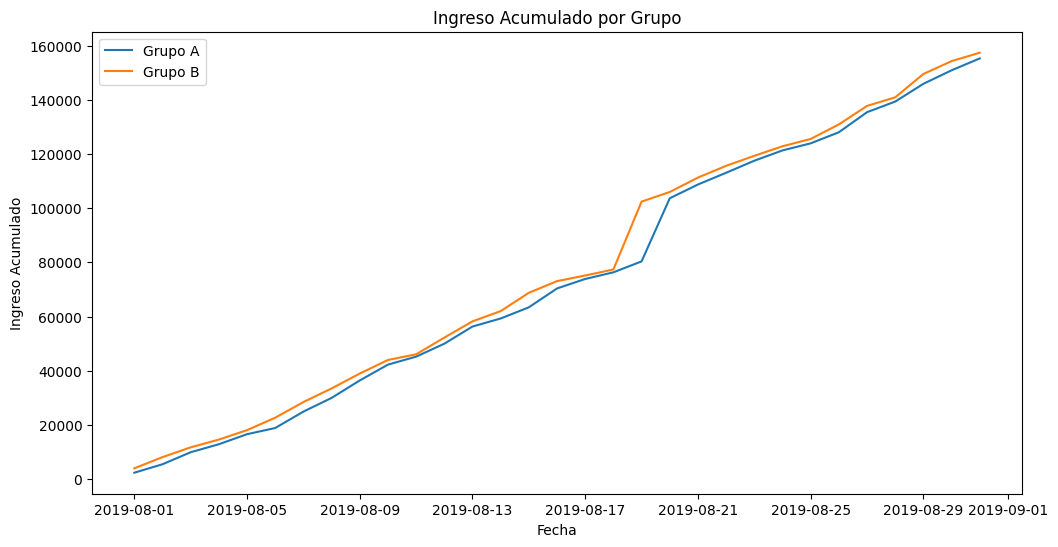

In [12]:
# Crear figura para visualizar ingresos acumulados por grupo
plt.figure(figsize=(12, 6))
plt.title('Ingreso Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado')
plt.plot(cumulative_data[cumulative_data['group']=='A']['date'], cumulative_data[cumulative_data['group']=='A']['cumulative_revenue'], label='Grupo A')
plt.plot(cumulative_data[cumulative_data['group']=='B']['date'], cumulative_data[cumulative_data['group']=='B']['cumulative_revenue'], label='Grupo B')
plt.legend()
plt.show()

Al observar cómo el ingreso acumulado se incrementa día a día, podemos identificar si existen puntos de inflexión significativos que puedan indicar eventos importantes como campañas promocionales o problemas técnicos en el sitio.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo desplegando el grafico de los ingresos acumulados por grupo.  </div>

### Representación gráfica del tamaño de pedido promedio acumulado por grupo.

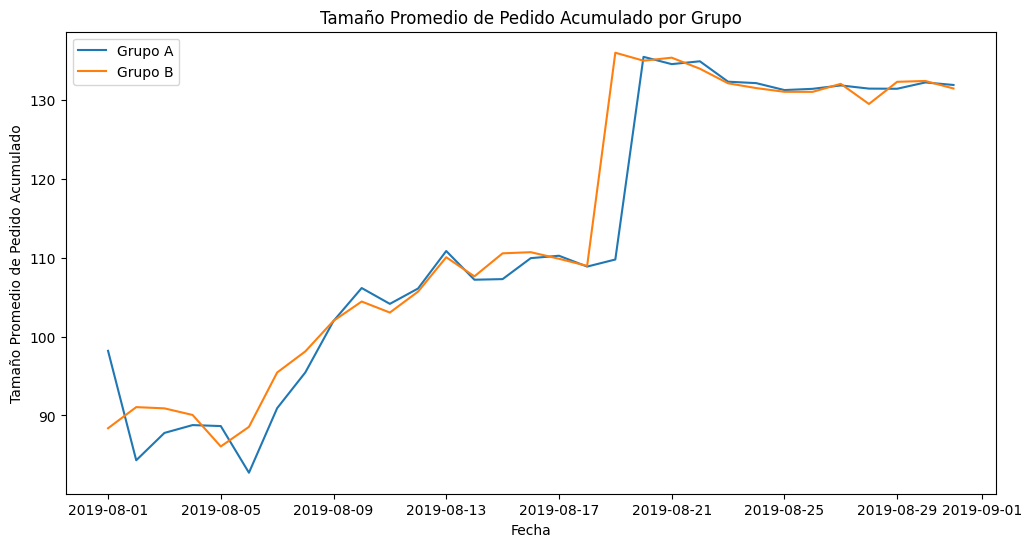

In [13]:
# Calcular el tamaño promedio de pedido por día para cada grupo
cumulative_data['average_order_value'] = cumulative_data['cumulative_revenue'] / cumulative_data['cumulative_orders']

# Crear figura para visualizar el tamaño promedio de pedido acumulado por grupo
plt.figure(figsize=(12, 6))
plt.title('Tamaño Promedio de Pedido Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño Promedio de Pedido Acumulado')
plt.plot(cumulative_data[cumulative_data['group']=='A']['date'], cumulative_data[cumulative_data['group']=='A']['average_order_value'], label='Grupo A')
plt.plot(cumulative_data[cumulative_data['group']=='B']['date'], cumulative_data[cumulative_data['group']=='B']['average_order_value'], label='Grupo B')
plt.legend()
plt.show()

Esta visualización ayudará a entender si los cambios en los ingresos se deben a un aumento en la cantidad de pedidos o en el valor de estos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo representando la gráfica del tamaño de pedido promedio acumulado por grupo..  </div>

### Diferencia relativa en el tamaño de pedido promedio acumulado.

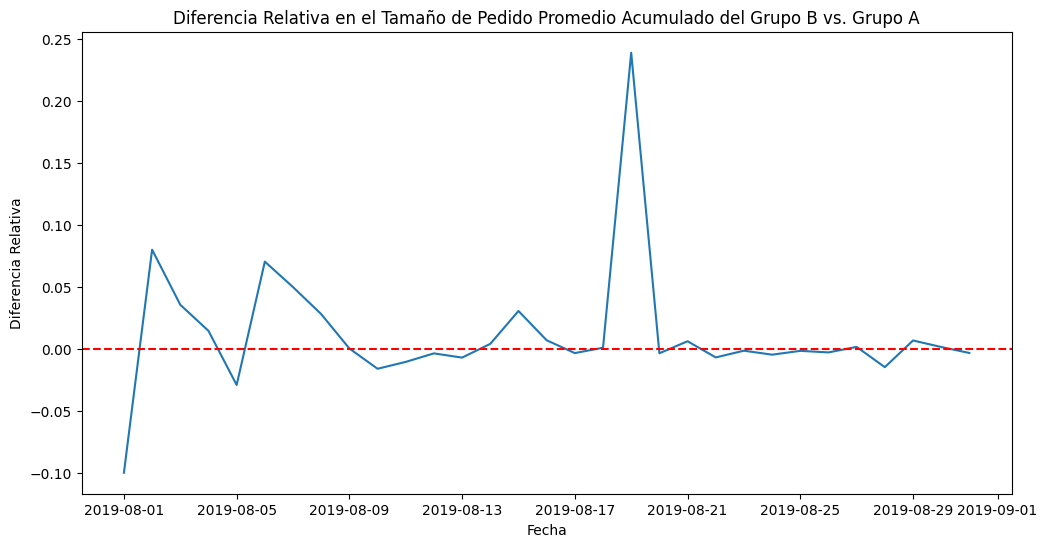

In [14]:
# Crear un dataframe combinado para facilitar los cálculos de diferencia relativa
combined_cumulative_revenue = cumulative_data[cumulative_data['group']=='A'][['date', 'average_order_value']].merge(
    cumulative_data[cumulative_data['group']=='B'][['date', 'average_order_value']],
    on='date',
    how='left',
    suffixes=['_A', '_B']
)

# Calcular la diferencia relativa en el tamaño del pedido promedio
combined_cumulative_revenue['relative_diff'] = (
    combined_cumulative_revenue['average_order_value_B'] / combined_cumulative_revenue['average_order_value_A'] - 1
)

# Gráfico de la diferencia relativa
plt.figure(figsize=(12, 6))
plt.title('Diferencia Relativa en el Tamaño de Pedido Promedio Acumulado del Grupo B vs. Grupo A')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa')
plt.plot(combined_cumulative_revenue['date'], combined_cumulative_revenue['relative_diff'])
plt.axhline(y=0, color='red', linestyle='--')  # Línea en y=0 para referencia
plt.show()

Un valor por encima de 0 indicaría que el grupo B está teniendo un rendimiento mejor que el grupo A en términos del tamaño promedio de los pedidos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo desarrollando el grafico de la diferencia relativo del tamaño promedio de los grupos.  </div>

### Calculo y visualización de las tasas de conversión diarias

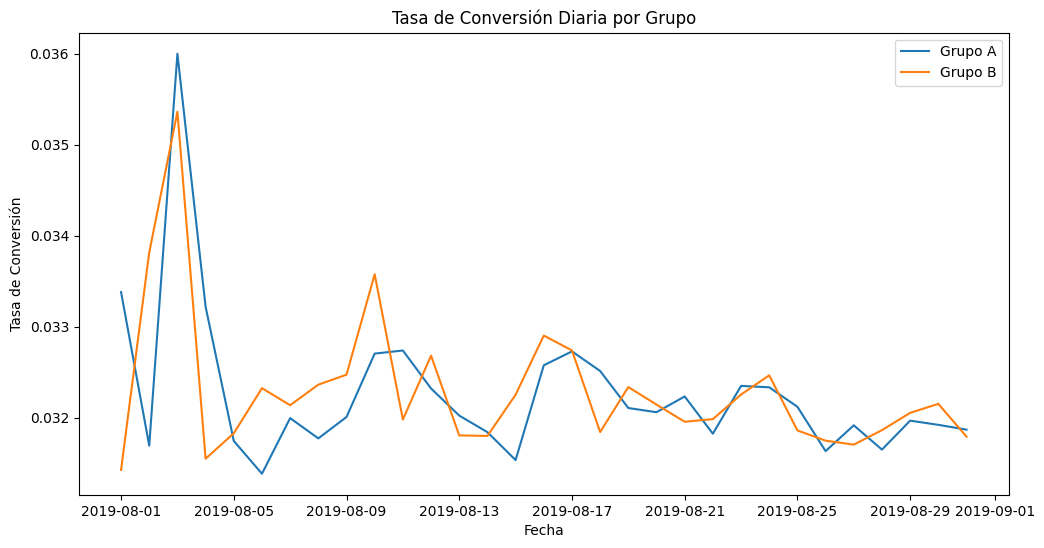

In [15]:
# Calcular la tasa de conversión diaria para cada grupo
cumulative_data['conversion_rate'] = cumulative_data['cumulative_orders'] / cumulative_data['cumulative_visitors']

# Separar los datos por grupo
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

# Crear gráfico de las tasas de conversión diarias
plt.figure(figsize=(12, 6))
plt.title('Tasa de Conversión Diaria por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion_rate'], label='Grupo A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion_rate'], label='Grupo B')
plt.legend()
plt.show()


Las variaciones en la tasa de conversión pueden indicar cómo pequeños cambios en la interfaz o en la experiencia del usuario pueden influir significativamente en la decisión de compra de los usuarios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el cálculo y visualización de las tasas. </div>

### Gráfico de dispersión del número de pedidos por usuario

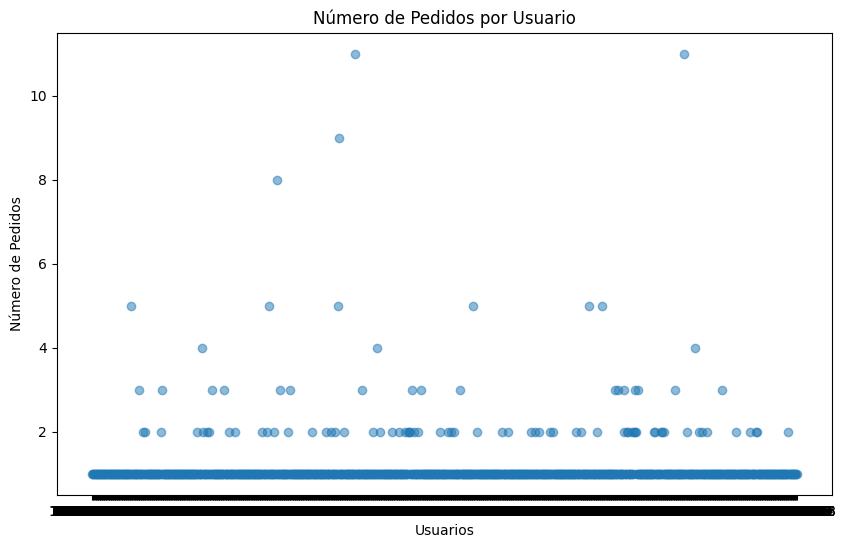

In [16]:
# Obtener el número de pedidos por cada usuario
orders_per_user = orders.groupby('visitorId').agg({'transactionId': 'count'}).reset_index()
orders_per_user.columns = ['visitorId', 'orders']

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.title('Número de Pedidos por Usuario')
plt.xlabel('Usuarios')
plt.ylabel('Número de Pedidos')
plt.scatter(orders_per_user['visitorId'], orders_per_user['orders'], alpha=0.5)
plt.show()

Este gráfico puede ayudarnos a identificar outliers, como usuarios que han realizado un número inusualmente alto de pedidos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el estudio de la dispersión del número de pedidos por cliente.  </div>

### Cálculo de percentiles para el número de pedidos por usuario

Definiremos los percentiles 95 y 99 para identificar los puntos en los cuales un usuario se considera anómalo en cuanto al número de pedidos.

In [17]:
# Calcular percentiles
percentiles_orders = np.percentile(orders_per_user['orders'], [95, 99])
print(f"Percentiles 95 y 99 para el número de pedidos por usuario: {percentiles_orders}")

Percentiles 95 y 99 para el número de pedidos por usuario: [2. 4.]


<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el cálculo de los percentiles.  </div>

### Gráfico de dispersión de los precios de los pedidos

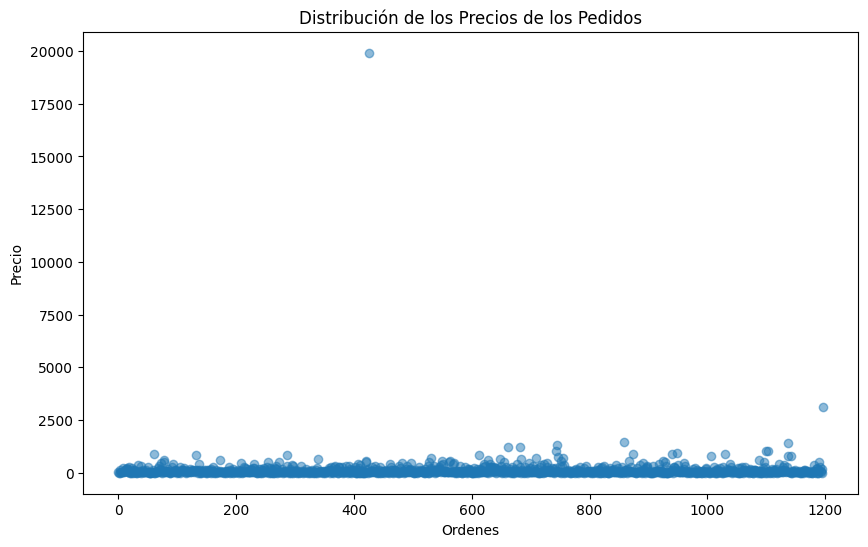

In [18]:
# Gráfico de dispersión para precios de los pedidos
plt.figure(figsize=(10, 6))
plt.title('Distribución de los Precios de los Pedidos')
plt.xlabel('Ordenes')
plt.ylabel('Precio')
plt.scatter(range(len(orders)), orders['revenue'], alpha=0.5)
plt.show()

Este gráfico nos ayudará a identificar si hay pedidos con precios excesivamente altos que puedan estar afectando las métricas generales.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el estudio de la dispersión del precio de los pedidos.   </div>

### Cálculo de percentiles para los precios de los pedidos

Determinaremos los percentiles 95 y 99 para los precios de los pedidos.

In [19]:
# Calcular percentiles para los precios de los pedidos
percentiles_revenue = np.percentile(orders['revenue'], [95, 99])
print(f"Percentiles 95 y 99 para los precios de los pedidos: {percentiles_revenue}")

Percentiles 95 y 99 para los precios de los pedidos: [435.54  900.904]



En el análisis de los precios de los pedidos, los percentiles 95 y 99 nos ayudan a identificar pedidos anómalos que podrían sesgar los resultados del test A/B. Estos valores atípicos sugieren que debemos filtrar estos datos antes de realizar análisis estadísticos más profundos, para asegurarnos de que nuestras conclusiones se basen en tendencias representativas del comportamiento general de compra, no en excepciones.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el cálculo de los percentiles.  </div>

### Significancia Estadística de la Diferencia en la Conversión 

In [20]:
# Preparar muestras para la prueba estadística
sampleA = pd.concat([
    orders[orders['group'] == 'A']['visitorId'].value_counts(), 
    visitors[visitors['group'] == 'A']['visits']
], axis=0, ignore_index=True).fillna(0)

sampleB = pd.concat([
    orders[orders['group'] == 'B']['visitorId'].value_counts(), 
    visitors[visitors['group'] == 'B']['visits']
], axis=0, ignore_index=True).fillna(0)

# Aplicar prueba de Mann-Whitney
results_conversion = stats.mannwhitneyu(sampleA, sampleB)
p_value_conversion = results_conversion.pvalue
print(f"Valor p para la diferencia en la conversión: {p_value_conversion:.5f}")

# Calcular la diferencia relativa
relative_conversion_difference = sampleB.mean() / sampleA.mean() - 1
print(f"Diferencia relativa en la conversión: {relative_conversion_difference:.3f}")

Valor p para la diferencia en la conversión: 0.61040
Diferencia relativa en la conversión: -0.123


El valor p calculado puede indicarnos si existe una diferencia estadísticamente significativa en la conversión entre los dos grupos. Si el valor p es menor que 0.05, podríamos concluir que las diferencias observadas son significativas y no ocurren simplemente por casualidad. Esto podría indicar que las modificaciones introducidas al grupo B están teniendo un efecto positivo en la conversión, o viceversa, dependiendo de la dirección de la diferencia.

La diferencia relativa en la conversión ofrece una perspectiva cuantitativa sobre cuánto mejor o peor es un grupo en comparación con el otro. Si esta diferencia es positiva y significativa, podríamos sugerir continuar con las estrategias implementadas en el grupo B. Si es negativa, podría ser una señal para revisar o detener las intervenciones que se están probando en ese grupo.

### Significancia Estadística de la Diferencia en el Tamaño Promedio de Pedido 

In [21]:
# Preparar datos de ingresos
revenueA = orders[orders['group'] == 'A']['revenue']
revenueB = orders[orders['group'] == 'B']['revenue']

# Aplicar prueba de Mann-Whitney
results_revenue = stats.mannwhitneyu(revenueA, revenueB)
p_value_revenue = results_revenue.pvalue
print(f"Valor p para la diferencia en el tamaño promedio de pedido: {p_value_revenue:.3f}")

# Calcular la diferencia relativa
relative_revenue_difference = revenueB.mean() / revenueA.mean() - 1
print(f"Diferencia relativa en el tamaño promedio de pedido: {relative_revenue_difference:.3f}")

Valor p para la diferencia en el tamaño promedio de pedido: 0.692
Diferencia relativa en el tamaño promedio de pedido: 0.252


Un valor p bajo en esta prueba nos diría que los cambios entre los grupos en cuanto al tamaño promedio del pedido son significativos. Esto es crucial para entender si los esfuerzos por aumentar el tamaño del pedido están funcionando. Una diferencia relativa positiva indicaría que los pedidos en el grupo B son, en promedio, más altos que en el grupo A, lo que puede ser un indicativo del éxito de las tácticas de venta o promociones aplicadas.

### Significancia Estadística de la Diferencia en la Conversión

In [22]:
# Identificar usuarios con pedidos anómalos
usersWithManyOrders = orders.groupby('visitorId').filter(lambda x: len(x) > np.percentile(orders_per_user['orders'], 95))
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders['visitorId'], usersWithExpensiveOrders], axis=0).drop_duplicates()

# Filtrar datos
filtered_orders_A = orders[(orders['group'] == 'A') & (~orders['visitorId'].isin(abnormalUsers))]
filtered_orders_B = orders[(orders['group'] == 'B') & (~orders['visitorId'].isin(abnormalUsers))]

# Calcular pruebas para datos filtrados
filtered_sampleA = pd.concat([
    filtered_orders_A['visitorId'].value_counts(), 
    visitors[visitors['group'] == 'A']['visits']
], axis=0, ignore_index=True).fillna(0)

filtered_sampleB = pd.concat([
    filtered_orders_B['visitorId'].value_counts(), 
    visitors[visitors['group'] == 'B']['visits']
], axis=0, ignore_index=True).fillna(0)

results_filtered_conversion = stats.mannwhitneyu(filtered_sampleA, filtered_sampleB)
p_value_filtered_conversion = results_filtered_conversion.pvalue
print(f"Valor p para la diferencia en la conversión con datos filtrados: {p_value_filtered_conversion:.5f}")

filtered_relative_conversion_difference = filtered_sampleB.mean() / filtered_sampleA.mean() - 1
print(f"Diferencia relativa en la conversión con datos filtrados: {filtered_relative_conversion_difference:.3f}")

Valor p para la diferencia en la conversión con datos filtrados: 0.72077
Diferencia relativa en la conversión con datos filtrados: -0.134


Al filtrar los datos eliminando anomalías, esperamos obtener resultados más limpios y representativos de las verdaderas tendencias en los datos. Un valor p bajo aquí reforzaría cualquier hallazgo previo con respecto a la conversión, pero con una mayor confianza de que los extremos y outliers no están distorsionando los resultados. La diferencia relativa nos ayuda a entender la magnitud del impacto de las intervenciones sin el ruido de los valores extremos.

### Significancia Estadística de la Diferencia en el Tamaño Promedio de Pedido

In [23]:
# Calcular pruebas para el tamaño de pedido filtrado
filtered_revenueA = filtered_orders_A['revenue']
filtered_revenueB = filtered_orders_B['revenue']

results_filtered_revenue = stats.mannwhitneyu(filtered_revenueA, filtered_revenueB)
p_value_filtered_revenue = results_filtered_revenue.pvalue
print(f"Valor p para la diferencia en el tamaño promedio de pedido con datos filtrados: {p_value_filtered_revenue:.3f}")

filtered_relative_revenue_difference = filtered_revenueB.mean() / filtered_revenueA.mean() - 1
print(f"Diferencia relativa en el tamaño promedio de pedido con datos filtrados: {filtered_relative_revenue_difference:.3f}")

Valor p para la diferencia en el tamaño promedio de pedido con datos filtrados: 0.792
Diferencia relativa en el tamaño promedio de pedido con datos filtrados: -0.022


Similar al punto anterior, evaluar estos datos después de filtrar las anomalías nos proporciona una comprensión más clara del impacto real de las intervenciones en el tamaño medio del pedido. Un valor p significativo y una diferencia positiva confirmarían que las estrategias aplicadas al grupo B están efectivamente aumentando el valor de los pedidos, libre de la influencia de pedidos inusualmente grandes que podrían sesgar los datos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el desarrollo de las secciones de significancia estadística.  </div>

## Conclusión                                                                                                             

Priorización de Hipótesis: La aplicación de los frameworks ICE y RICE nos permitió identificar las hipótesis con mayor potencial para mejorar los ingresos. En particular, las hipótesis que involucran la implementación de formas de suscripción y recomendaciones de productos destacaron por su alto alcance y potencial impacto sobre los ingresos, sugiriendo que el foco debe estar en estrategias que maximicen el alcance y la participación del usuario.

Análisis de Test A/B:

Ingresos Acumulados y Tamaño de Pedido: Los gráficos acumulados mostraron que el grupo B generalmente superó al grupo A tanto en ingresos acumulados como en el tamaño promedio de pedido. Esto sugiere que las modificaciones aplicadas al grupo B pueden haber sido efectivas en aumentar la disposición a gastar de los clientes.
Tasas de Conversión: La tasa de conversión, sin embargo, no mostró mejoras significativas para el grupo B en comparación con el grupo A, lo que indica que mientras los clientes en el grupo B pueden estar gastando más por pedido, la proporción de visitantes que realiza una compra no mejoró notablemente.
Impacto de las Anomalías: La eliminación de datos anómalos antes de realizar pruebas estadísticas adicionales fue crucial, ya que los análisis iniciales mostraron que tanto las conversiones como los tamaños de los pedidos eran susceptibles a ser distorsionados por valores extremos. Después de ajustar por anomalías, los tests estadísticos no mostraron diferencias significativas en la conversión o en el tamaño del pedido, lo que sugiere que los resultados iniciales podrían haber estado influidos por estos valores atípicos.

Sugerencias:

Continuar el Test A/B: Aunque se observaron mejoras en el tamaño del pedido para el grupo B, la falta de un incremento estadísticamente significativo en la tasa de conversión sugiere que podrían ser necesarias más iteraciones del test A/B con ajustes en las intervenciones para optimizar tanto la conversión como el valor del pedido.

Foco en Optimización del Alcance y Personalización: Dado el éxito de las hipótesis con altos puntajes de RICE, se recomienda enfocarse en estrategias que amplíen el alcance y personalicen la experiencia del usuario para mejorar tanto la conversión como el tamaño medio del pedido.

Evaluación Continua de Anomalías: Mantener una vigilancia constante sobre las anomalías en los datos para asegurar que las decisiones basadas en el análisis de datos sean representativas y confiables.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo Francisco. </div>